📌 Step 1: Import Required Libraries

In [43]:
import torch
import torch.nn as nn  # Neural network module
import numpy as np
import matplotlib.pyplot as plt  # For plotting
%matplotlib inline

[link text](https:// [link text](https://))📌 Step 2: Generate Random Data

In [44]:
X = torch.linspace(1,70,70).reshape(-1,1)

#torch.manual_seed(42)  # Ensures the same random numbers every time
#X = torch.rand(100, 1) * 100  # 100 random values (0 to 100)
#y = X * 2 + 1 + torch.randn(100, 1) * 10  # True function: y = 2x + noise

In [45]:
torch.manual_seed(71) # to obtain reproducible results
e = torch.randint(-8,9,(70,1),dtype=torch.float)
#print(e.sum())

In [46]:
y = 2*X + 1 + e
print(y.shape)

torch.Size([70, 1])


📌 Step 3: Visualizing the Data

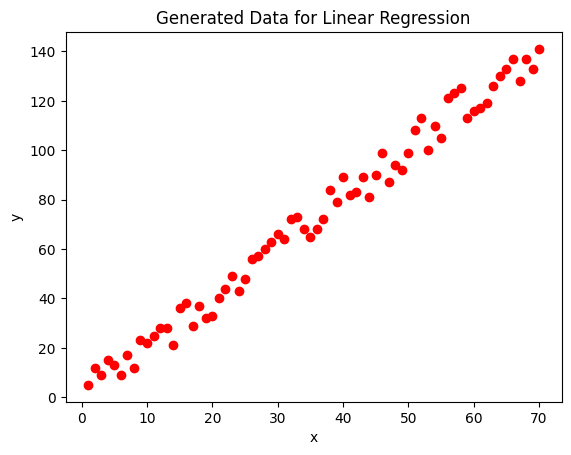

In [47]:
plt.scatter(X.numpy(), y.numpy(),color='red')  # Scatter plot of data points
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data for Linear Regression')
plt.show()

📌 Step 4: Define a Linear Regression Model

In [48]:
# Setting a manual seed for reproducibility
torch.manual_seed(59)

# Defining the model class
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [49]:
# Creating an instance of the model
torch.manual_seed(59)
model = Model(1, 1)
print('Weight:', model.linear.weight.item())
print('Bias:  ', model.linear.bias.item())

Weight: 0.10597813129425049
Bias:   0.9637961387634277


📌 Step 6: Define the Loss Function and Optimizer

In [56]:
loss_function = nn.MSELoss()  # Mean Squared Error (MSE) loss

optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)  # Stochastic Gradient Descent


📌 Step 7: Training the Model

In [57]:
epochs = 50  # Number of training iterations
losses = []  # List to store loss values

for epoch in range(1, epochs + 1):  # Start from 1 to 50
    optimizer.zero_grad()  # Clear previous gradients
    y_pred = model(X)  # Forward pass
    loss = loss_function(y_pred, y)  # Compute loss
    losses.append(loss.item())  # Store loss value

    loss.backward()  # Compute gradients
    optimizer.step()  # Update weights

    # Print loss, weight, and bias for EVERY epoch (1 to 50)
    print(f'epoch: {epoch:2}  loss: {loss.item():10.8f}  '
          f'weight: {model.linear.weight.item():10.8f}  '
          f'bias: {model.linear.bias.item():10.8f}')


epoch:  1  loss:        inf  weight: -3513343171511713792.00000000  bias: -74762899448397824.00000000
epoch:  2  loss:        inf  weight: -2340409730645622784.00000000  bias: -49803212403769344.00000000
epoch:  3  loss:        inf  weight: -1559061446136954880.00000000  bias: -33176341733965824.00000000
epoch:  4  loss:        inf  weight: -1038567141357387776.00000000  bias: -22100370549374976.00000000
epoch:  5  loss:        inf  weight: -691840341426307072.00000000  bias: -14722123540987904.00000000
epoch:  6  loss:        inf  weight: -460868751277948928.00000000  bias: -9807112217559040.00000000
epoch:  7  loss:        inf  weight: -307007217255579648.00000000  bias: -6532982412148736.00000000
epoch:  8  loss:        inf  weight: -204512530020696064.00000000  bias: -4351924467924992.00000000
epoch:  9  loss:        inf  weight: -136235804283371520.00000000  bias: -2899015414841344.00000000
epoch: 10  loss:        inf  weight: -90753337569312768.00000000  bias: -1931161580339200.0

Plot the loss values

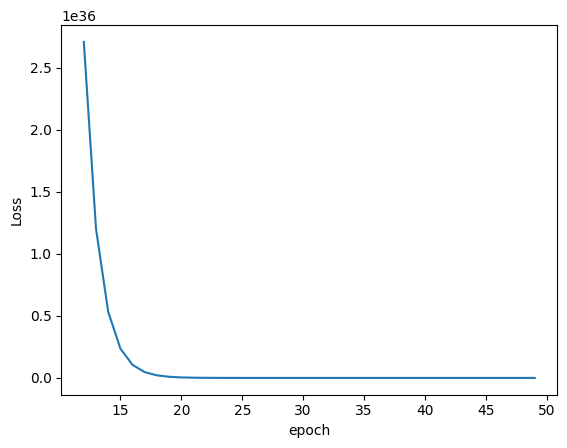

In [58]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');
plt.show()

📌 Step 8: Extract the Learned Weight and Bias

In [59]:
# Automatically determine x-range
x1 = torch.tensor([X.min().item(), X.max().item()])

# Extract model parameters
w1, b1 = model.linear.weight.item(), model.linear.bias.item()

# Compute y1 (predicted values)
y1 = x1 * w1 + b1


In [60]:
# Print weight, bias, and x/y values
print(f'Final Weight: {w1:.8f}, Final Bias: {b1:.8f}')
print(f'X range: {x1.numpy()}')
print(f'Predicted Y values: {y1.numpy()}')

Final Weight: -8878994432.00000000, Final Bias: 43186950144.00000000
X range: [ 1. 70.]
Predicted Y values: [ 3.4307957e+10 -5.7834262e+11]


📌 Step 9: Plot the Best-Fit Line

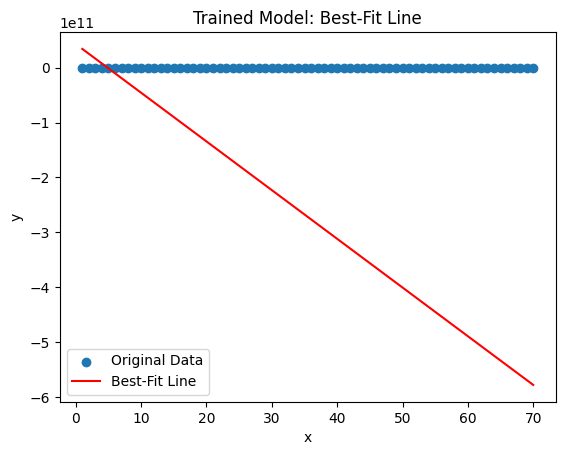

In [63]:
# Plot original data and best-fit line
plt.scatter(X.numpy(), y.numpy(), label="Original Data")
plt.plot(x1.numpy(), y1.numpy(), 'r', label="Best-Fit Line")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trained Model: Best-Fit Line')
plt.legend()
plt.show()

In [64]:
torch.save(model.state_dict(), 'Barath 212222230018')